In [1]:
import lightkurve as lk
import numpy as np

Examples from LightKurve documentation:

In [2]:
from lightkurve import search_targetpixelfile

# First we open a Target Pixel File from MAST, this one is already cached from our previous tutorial!
tpf = search_targetpixelfile('KIC 6922244', author="Kepler", cadence="long", quarter=4).download()

# Then we convert the target pixel file into a light curve using the pipeline-defined aperture mask.
lc = tpf.to_lightcurve(aperture_mask=tpf.pipeline_mask)

In [22]:
print(lc.flux)
print(lc.time)
#Combined Differential Photometric Precision (“CDPP”) noise metric of the lightcurve using the built in method estimate_cdpp()
lc.estimate_cdpp()

[43689.15  43698.08  43694.105 ... 43155.8   43148.465 43151.562] electron / s
[352.37632485 352.39675805 352.43762445 ... 442.16263546 442.18306983
 442.2035041 ]


<bound method LightCurve.estimate_cdpp of <KeplerLightCurve length=4116 LABEL="KIC 6922244" QUARTER=4 CAMPAIGN=None>
       time             flux           flux_err      ... cadenceno quality
                    electron / s     electron / s    ...                  
       Time           float32          float32       ...   int32    int32 
------------------ -------------- ------------------ ... --------- -------
352.37632485035283  43689.1484375  6.631562232971191 ...     11914       0
 352.3967580484896   43698.078125  6.631830215454102 ...     11915    8192
 352.4376244455707 43694.10546875 6.6317877769470215 ...     11917      16
352.45805764463876 43698.31640625  6.631948947906494 ...     11918       0
 352.4784908439324  43687.6484375  6.631504535675049 ...     11919       0
 352.4989240434661  43686.4765625 6.6314263343811035 ...     11920       0
 352.5193572433491    43692.59375  6.631662845611572 ...     11921       0
352.53979034345684 43712.01953125 6.6356940269470215 ...  

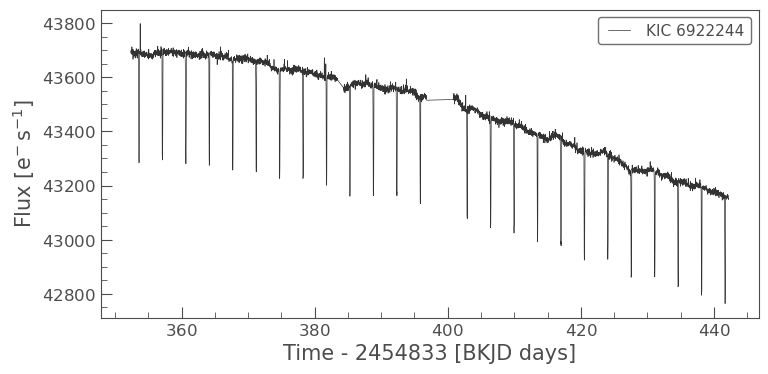

In [4]:
%matplotlib inline
lc.plot();

<Axes: xlabel='Phase [JD]', ylabel='Normalized Flux'>

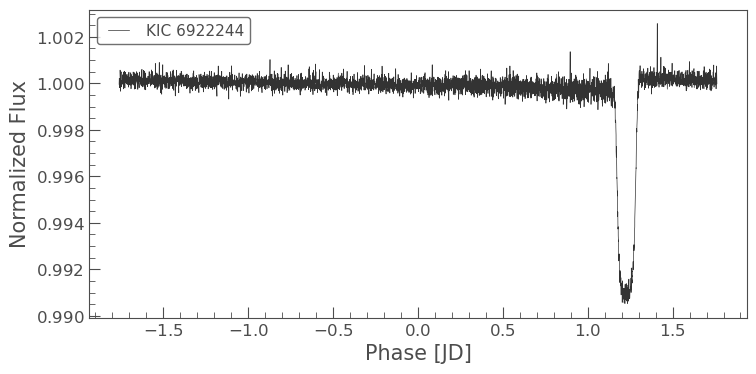

In [23]:
'''
There are a set of useful functions in LightCurve objects which you can use to work with the data. These include:

flatten(): Remove long term trends using a Savitzky–Golay filter

remove_outliers(): Remove outliers using simple sigma clipping

remove_nans(): Remove infinite or NaN values (these can occur during thruster firings)

fold(): Fold the data at a particular period, 

bin(): Reduce the time resolution of the array, taking the average value in each bin.

We can use these simply on a light curve object
'''

flattened_lc = lc.flatten(window_length=440)
flattened_lc.plot()

<Axes: xlabel='Phase [JD]', ylabel='Normalized Flux'>

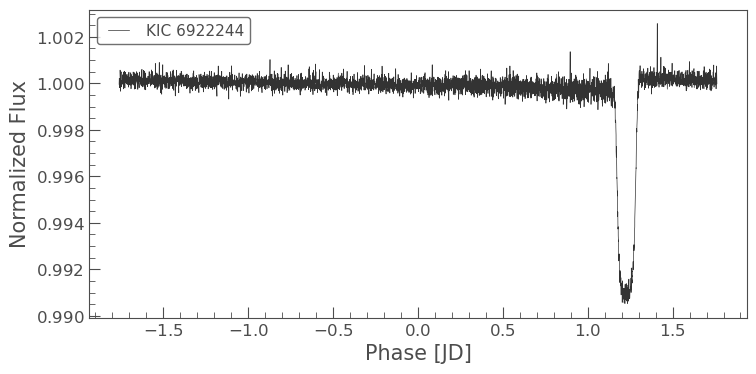

In [24]:
flattened_fold_lc = flattened_lc.fold(period=3.5225)
flattened_fold_lc.plot()

<Axes: xlabel='Phase [JD]', ylabel='Normalized Flux'>

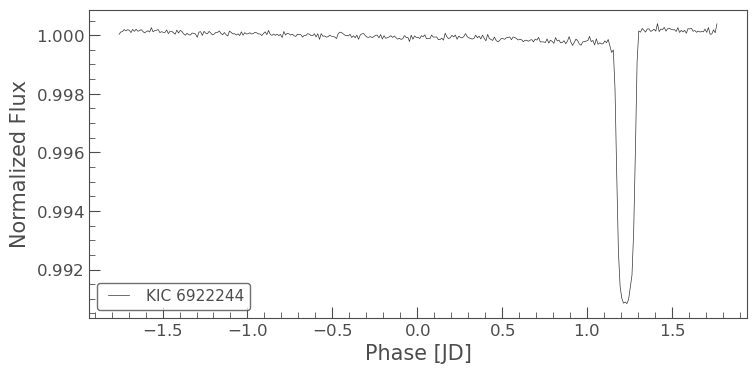

In [26]:
#note: overly large binning reduces resolution of curve
flattened_fold_bin_lc = flattened_fold_lc.bin(time_bin_size=0.01)
flattened_fold_bin_lc.plot()